Twos split lengths:
16
16
16
Value counts after replacement:
0.0    28
1.0    24
2.0    24
3.0    24
4.0    16
5.0    16
6.0    16
7.0    48
Name: 4_water, dtype: int64


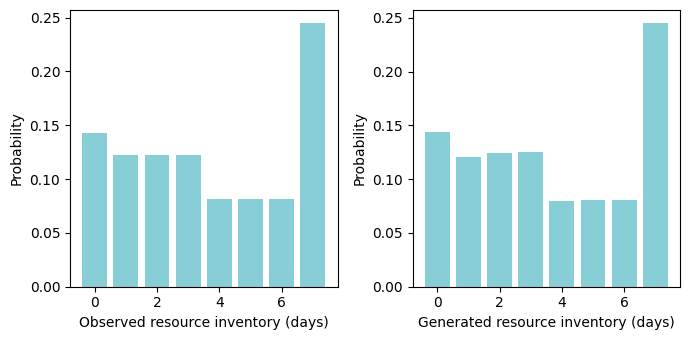

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/southpark_survey_with_address.csv"
all_residents_file = "data/southpark_address.csv"

df = pd.read_csv(file_path)
all_residents_df = pd.read_csv(all_residents_file)

columns_to_process = ['4_water']

# 删除原本=4的值
df = df[df[columns_to_process[0]] != 4]

# replace values
def replace_based_on_value(df, column):
    ones = df[df[column] == 1].index.tolist()
    twos = df[df[column] == 2].index.tolist()
    threes = df[df[column] == 3].index.tolist()
    
    np.random.shuffle(ones)
    np.random.shuffle(twos)
    
    ones_split = np.array_split(ones, 3)
    twos_split = np.array_split(twos, 3)
    
    df.loc[ones_split[0], column] = 1
    df.loc[ones_split[1], column] = 2
    df.loc[ones_split[2], column] = 3
    
    df.loc[twos_split[0], column] = 4
    df.loc[twos_split[1], column] = 5
    df.loc[twos_split[2], column] = 6
    
    print("Twos split lengths:")
    print(len(twos_split[0]))
    print(len(twos_split[1]))
    print(len(twos_split[2]))
    
    df.loc[threes, column] = 7

replace_based_on_value(df, columns_to_process[0])

# Calculate probabilities
value_counts = df[columns_to_process[0]].value_counts().sort_index()
total_counts = value_counts.sum()
probabilities = value_counts / total_counts
print("Value counts after replacement:")
print(value_counts)

# Generate data based on probabilities
for column in columns_to_process:
    column_data = df[column]

    # Initialize full_series, the same length as all_residents_df
    full_series = pd.Series(np.nan, index=np.arange(len(all_residents_df)))

    # Copy the original column data
    full_series.iloc[:len(column_data)] = column_data

    # Generate, based on data distribution
    original_values = column_data.dropna().values
    repeated_values = np.tile(original_values, (len(all_residents_df) // len(original_values)) + 1)
    np.random.shuffle(repeated_values)
    full_series = pd.Series(repeated_values[:len(all_residents_df)])
  
    all_residents_df[column + '_new'] = full_series

# Calculate the new probabilities
value_counts_new = all_residents_df['4_water_new'].value_counts().sort_index()
total_counts_new = value_counts_new.sum()
probabilities_new = value_counts_new / total_counts_new

fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

# Original data distribution
axes[0].bar(probabilities.index, probabilities, color='#88ced6')
axes[0].set_xlabel('Observed resource inventory (days)')
axes[0].set_ylabel('Probability')

# Generated data distribution
axes[1].bar(probabilities_new.index, probabilities_new, color='#88ced6')
axes[1].set_xlabel('Generated resource inventory (days)')
axes[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()


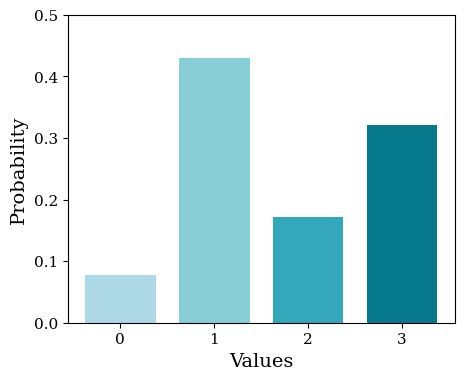

In [19]:
import matplotlib.pyplot as plt

# Given data
values = [0.0, 1.0, 2.0, 3.0]
probabilities = [0.077720, 0.430052, 0.170984,0.321244]
colors = ['#ADD8E6', '#88ced6', '#33a8ba', '#07798c']


# Create a bar plot
fig, ax = plt.subplots(figsize=(5, 4))

# Plotting the bars
bars = ax.bar(values, probabilities, color=colors, width=0.75)

# Adding labels and title
ax.set_xlabel('Values', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
# ax.set_title('Probability Distribution', fontsize=16)

# Setting x-ticks at each bar
ax.set_xticks(values)
ax.tick_params(axis='x', direction='out')

# Setting y-ticks
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4,0.5])
ax.set_ylim(0, 0.5)

# Display the plot
plt.show()


0.0    0.077720
1.0    0.430052
2.0    0.170984
3.0    0.321244
Name: 7_water, dtype: float64


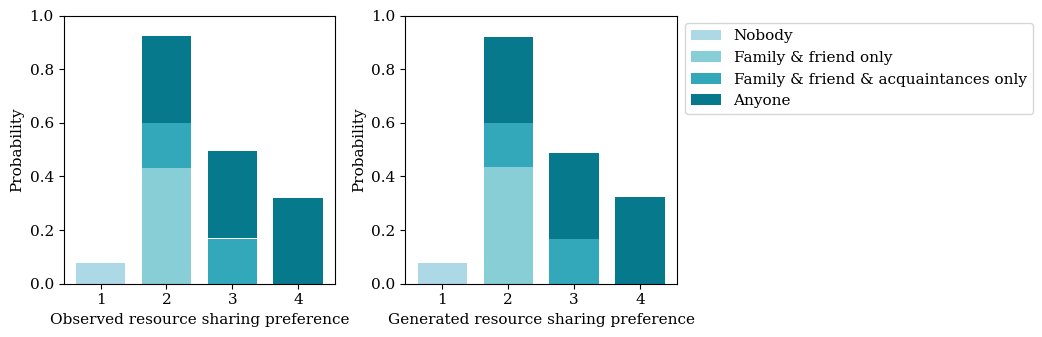

In [15]:
width = 0.75
ind = np.arange(1, 5)
columns_to_process = ['7_water']

# Calculate probabilities
value_counts = df[columns_to_process[0]].value_counts().sort_index()
total_counts = value_counts.sum()
probabilities = value_counts / total_counts
print(probabilities)
# Generate data based on the original distribution
for column in columns_to_process:
    column_data = df[column]

    full_series = pd.Series(np.nan, index=np.arange(len(all_residents_df)))

    full_series.iloc[:len(column_data)] = column_data

    original_values = column_data.dropna().values
    repeated_values = np.tile(original_values, (len(all_residents_df) // len(original_values)) + 1)
    np.random.shuffle(repeated_values)
    full_series = pd.Series(repeated_values[:len(all_residents_df)])

    all_residents_df[column + '_new'] = full_series

# Calculate probabilities
value_counts_new = all_residents_df['7_water_new'].value_counts().sort_index()
total_counts_new = value_counts_new.sum()
probabilities_new = value_counts_new / total_counts_new

colors = ['#ADD8E6', '#88ced6', '#33a8ba', '#07798c']

fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

axes[0].bar(ind[0], probabilities.iloc[0], width, color=colors[0])
axes[0].bar(ind[1], probabilities.iloc[1], width, color=colors[1])
axes[0].bar(ind[1], probabilities.iloc[2], width, bottom=probabilities.iloc[1], color=colors[2])
axes[0].bar(ind[1], probabilities.iloc[3], width, bottom=probabilities.iloc[1] + probabilities.iloc[2], color=colors[3])

axes[0].bar(ind[2], probabilities_new.iloc[2], width, color=colors[2])
axes[0].bar(ind[2], probabilities_new.iloc[3], width, bottom=probabilities.iloc[2], color=colors[3])

axes[0].bar(ind[3], probabilities.iloc[3], width, color=colors[3])

axes[0].set_xlabel('Observed resource sharing preference')
axes[0].set_ylabel('Probability')

axes[0].set_ylim(0, 1)  

ind = np.arange(1, 5)  
width = 0.75

axes[1].bar(ind[0], probabilities_new.iloc[0], width, color=colors[0], label='Nobody')
axes[1].bar(ind[1], probabilities_new.iloc[1], width, color=colors[1], label='Family & friend only')
axes[1].bar(ind[1], probabilities_new.iloc[2], width, bottom=probabilities_new.iloc[1], color=colors[2], label='Family & friend & acquaintances only')
axes[1].bar(ind[1], probabilities_new.iloc[3], width, bottom=probabilities_new.iloc[1] + probabilities_new.iloc[2], color=colors[3], label='Anyone')

axes[1].bar(ind[2], probabilities_new.iloc[2], width, color=colors[2])
axes[1].bar(ind[2], probabilities_new.iloc[3], width, bottom=probabilities_new.iloc[2], color=colors[3])

axes[1].bar(ind[3], probabilities_new.iloc[3], width, color=colors[3])

axes[1].set_xlabel('Generated resource sharing preference')
axes[1].set_ylabel('Probability')

axes[1].set_ylim(0, 1)  

axes[1].set_xticks(ind)
axes[1].set_xticklabels(['1', '2', '3', '4'])

plt.tight_layout()

axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


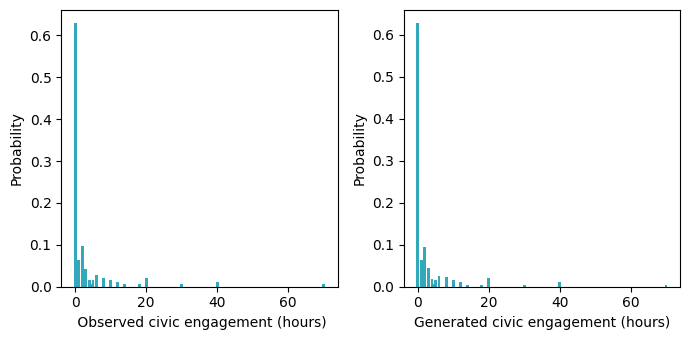

In [3]:
columns_to_process = ['11_hours']


# Calculate probabilities
value_counts = df[columns_to_process[0]].value_counts().sort_index()
total_counts = value_counts.sum()
probabilities = value_counts / total_counts

# generated data based on probabilities
for column in columns_to_process:
    column_data = df[column]

    full_series = pd.Series(np.nan, index=np.arange(len(all_residents_df)))

    full_series.iloc[:len(column_data)] = column_data

    original_values = column_data.dropna().values
    repeated_values = np.tile(original_values, (len(all_residents_df) // len(original_values)) + 1)
    np.random.shuffle(repeated_values)
    full_series = pd.Series(repeated_values[:len(all_residents_df)])

  
    all_residents_df[column + '_new'] = full_series

# Calculate the new probabilities
value_counts_new = all_residents_df['11_hours_new'].value_counts().sort_index()
total_counts_new = value_counts_new.sum()
probabilities_new = value_counts_new / total_counts_new


fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

# Original data distribution
axes[0].bar(probabilities.index, probabilities, color='#33a8ba')
axes[0].set_xlabel(' Observed civic engagement (hours)')
axes[0].set_ylabel('Probability')

# Generated data distribution
axes[1].bar(probabilities_new.index, probabilities_new, color='#33a8ba')
axes[1].set_xlabel('Generated civic engagement (hours)')
axes[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()


In [4]:
survey_df =df

In [5]:
# create a list of columns to filter
cols_to_filter = ['10_a_fri', '10_a_acq', 
                  '10_b_fri', '10_b_acq',
                  '10_c_fri', '10_c_acq', 
                  '10_d_fri', '10_d_acq',
                  '10_e_fri', '10_e_acq', 
                  '10_f_fri', '10_f_acq']

# convert non-numeric values to NaN
for col in cols_to_filter:
    survey_df[col] = pd.to_numeric(survey_df[col], errors='coerce')
# filter out rows with NaN values
clean_survey_df = survey_df.dropna(subset=cols_to_filter)
# reset the index
clean_survey_df.reset_index(drop=True, inplace=True)
clean_survey_df

,passcode,mode,1_cook,1_wash,1_health,1_warm,1_cool,1_safe,1_comm,1_transp,...,ADDRESS,Jurisdiction,Zip code,Use,MF,Apts,ID,latitude,longitude,area
0,82519,online,3.0,1.0,4.0,5.0,1.0,4.0,4.0,2.0,...,1043 S DONOVAN ST,SEATTLE,98108,NaN,NaN,NaN,669,47.525409,-122.318377,C
1,81101,online,2.0,2.0,1.0,4.0,1.0,3.0,5.0,1.0,...,1058 S DIRECTOR ST,SEATTLE,98108,NaN,NaN,NaN,734,47.522376,-122.317892,C
2,81843,online,4.0,4.0,4.0,4.0,2.0,5.0,5.0,5.0,...,1059 S HENDERSON ST,SEATTLE,98108,NaN,NaN,NaN,733,47.522852,-122.317801,C
3,82215,online,4.0,4.0,2.0,1.0,1.0,2.0,2.0,2.0,...,502 S TRENTON ST,SEATTLE,98108,NaN,NaN,NaN,1357,47.525010,-122.328009,E
4,82447,online,5.0,3.0,5.0,5.0,1.0,4.0,3.0,2.0,...,1231 S HENDERSON ST,SEATTLE,98108,NaN,NaN,NaN,791,47.522876,-122.316233,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,80827,paper,2.0,4.0,1.0,4.0,1.0,1.0,1.0,1.0,...,1247 S SULLIVAN ST,SEATTLE,98108,NaN,NaN,NaN,446,47.527116,-122.315525,B
105,82501,paper,5.0,5.0,5.0,5.0,3.0,5.0,3.0,1.0,...,8816 12TH AVE S,SEATTLE,98108,NaN,NaN,NaN,771,47.524077,-122.317387,C
106,80733,paper,4.0,4.0,5.0,5.0,2.0,3.0,1.0,2.0,...,9052 3RD AVE S,SEATTLE,98108,NaN,NaN,NaN,1019,47.521232,-122.330309,D
107,82079,paper,1.0,1.0,3.0,2.0,3.0,3.0,3.0,4.0,...,808 S THISTLE ST,SEATTLE,98108,NaN,NaN,NaN,197,47.528349,-122.322438,A


In [6]:
# pick the columns related to social ties
social_tie_df = clean_survey_df[['9_area', 'area',
                                '10_a_fri', '10_a_acq',
                                '10_b_fri', '10_b_acq',
                                '10_c_fri', '10_c_acq',
                                '10_d_fri', '10_d_acq',
                                '10_e_fri', '10_e_acq',
                                '10_f_fri', '10_f_acq'
                                ]]
social_tie_df[cols_to_filter] = social_tie_df[cols_to_filter].astype('int')

# create a new column for the sum of social ties
social_tie_df['sum_fri'] = social_tie_df['10_a_fri'] + social_tie_df['10_b_fri'] + social_tie_df['10_c_fri'] + social_tie_df['10_d_fri'] + social_tie_df['10_e_fri'] + social_tie_df['10_f_fri']
social_tie_df['sum_acq'] = social_tie_df['10_a_acq'] + social_tie_df['10_b_acq'] + social_tie_df['10_c_acq'] + social_tie_df['10_d_acq'] + social_tie_df['10_e_acq'] + social_tie_df['10_f_acq']
social_tie_df

/var/folders/kq/64hp13jd2zq8t3jms3pzw0ww0000gn/T/ipykernel_49272/2083668637.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_tie_df[cols_to_filter] = social_tie_df[cols_to_filter].astype('int')
/var/folders/kq/64hp13jd2zq8t3jms3pzw0ww0000gn/T/ipykernel_49272/2083668637.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_tie_df['sum_fri'] = social_tie_df['10_a_fri'] + social_tie_df['10_b_fri'] + social_tie_df['10_c_fri'] + social_tie_df['10_d_fri'] + social_tie_df['10_e_fri'] + social_tie_

,9_area,area,10_a_fri,10_a_acq,10_b_fri,10_b_acq,10_c_fri,10_c_acq,10_d_fri,10_d_acq,10_e_fri,10_e_acq,10_f_fri,10_f_acq,sum_fri,sum_acq
0,C,C,0,4,0,3,2,7,0,2,0,4,2,4,4,24
1,C,C,0,0,1,2,1,0,0,0,0,0,0,0,2,2
2,C,C,0,0,2,0,0,1,0,0,0,0,0,0,2,1
3,E,E,0,0,0,0,0,0,6,2,12,7,0,0,18,9
4,C,C,0,0,0,0,6,10,0,0,0,0,0,0,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,E,B,0,0,0,0,0,0,0,0,0,2,0,0,0,2
105,C,C,0,0,0,0,0,1,0,0,0,0,0,0,0,1
106,D,D,1,0,0,0,1,0,4,4,1,0,0,0,7,4
107,B,A,5,10,11,20,2,0,0,0,3,0,2,0,23,30


In [7]:

social_tie_df['10_a_fri'].corr(social_tie_df['10_b_fri'])
social_tie_df['10_a_acq'].corr(social_tie_df['10_b_acq'])

0.4679688737329425

In [8]:
# create a dataframe for each area
A_social_tie_df = social_tie_df[social_tie_df['area'] == 'A']
B_social_tie_df = social_tie_df[social_tie_df['area'] == 'B']
C_social_tie_df = social_tie_df[social_tie_df['area'] == 'C']
D_social_tie_df = social_tie_df[social_tie_df['area'] == 'D']
E_social_tie_df = social_tie_df[social_tie_df['area'] == 'E']
F_social_tie_df = social_tie_df[social_tie_df['area'] == 'F']

In [9]:
def plot_social_tie_hist(df, area):
    '''
    Plot the number of friends and acquaintances in each area
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the social tie data for the area
    area : str
        The area to plot
    
    Returns
    -------
    None
    '''

    fig, axs = plt.subplots(2, 1, figsize=(5, 5))
    
    axs[0].hist(df['sum_fri'], bins=max(df['sum_fri']), alpha=0.7, color='blue')
    axs[0].set_xlabel(f'Number of Friends from households in {area}')
    axs[0].set_ylabel('Number of Respondents')

    axs[1].hist(df['sum_acq'], bins=max(df['sum_acq']), alpha=0.7, color='green')
    axs[1].set_xlabel(f'Number of Acquaintances from households in {area}')
    axs[1].set_ylabel('Number of Respondents')

    plt.tight_layout()
    plt.show()

In [10]:
# Initialize a 7x7 matrix with zeros
number_of_respondents = np.zeros((6, 1))
strong_tie_matrix = np.zeros((6, 6))
weak_tie_matrix = np.zeros((6, 6))

# Define a dictionary to map area letters to indices
area_indices = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}

# Loop through the rows of the social_tie_df DataFrame
for index, row in social_tie_df.iterrows():

    # Determine the row index based on the area
    i = area_indices.get(row['area'], -1)
    if i != -1:
        number_of_respondents[i] += 1

        # Loop through the columns 10_a_fri to 10_g_acq
        # and add the value to the strong_tie_matrix and weak_tie_matrix
        for j, col in enumerate(['10_a_fri', '10_b_fri', '10_c_fri', '10_d_fri', '10_e_fri', '10_f_fri']):
            if type(row[col]) == int:
                strong_tie_matrix[i, j] += row[col]
        
        for j, col in enumerate(['10_a_acq', '10_b_acq', '10_c_acq', '10_d_acq', '10_e_acq', '10_f_acq']):
            if type(row[col]) == int:
                weak_tie_matrix[i, j] += row[col]

print("Total number of respondents:")
print(np.sum(number_of_respondents))
print("Number of respondents in each area:")
display(number_of_respondents)
print("Average strong tie matrix:")
display(np.round(strong_tie_matrix/number_of_respondents, 2))
print("Average weak tie matrix:")
display(np.round(weak_tie_matrix/number_of_respondents, 2))
print("Average social tie matrix:")
display(np.round((strong_tie_matrix + weak_tie_matrix)/number_of_respondents, 2))
print("Total number of ties:")
print(np.sum(strong_tie_matrix + weak_tie_matrix))

Total number of respondents:
109.0
Number of respondents in each area:


array([[20.],
       [17.],
       [32.],
       [14.],
       [15.],
       [11.]])

Average strong tie matrix:


array([[1.6 , 1.5 , 0.2 , 0.1 , 0.3 , 0.1 ],
       [1.  , 1.88, 0.71, 0.24, 0.35, 0.24],
       [0.75, 0.94, 1.75, 0.03, 0.34, 0.19],
       [0.64, 0.29, 1.  , 2.29, 0.86, 0.43],
       [0.33, 0.27, 0.13, 0.67, 2.93, 0.13],
       [0.09, 0.27, 0.36, 0.27, 0.09, 0.82]])

Average weak tie matrix:


array([[4.2 , 2.4 , 0.4 , 0.25, 0.1 , 0.1 ],
       [1.76, 5.29, 1.  , 0.41, 0.59, 0.71],
       [1.72, 1.28, 2.69, 0.28, 0.5 , 0.31],
       [0.71, 0.5 , 1.  , 4.43, 1.  , 0.21],
       [0.53, 0.33, 0.4 , 0.47, 3.  , 0.53],
       [0.82, 0.64, 1.27, 0.55, 0.82, 4.18]])

Average social tie matrix:


array([[5.8 , 3.9 , 0.6 , 0.35, 0.4 , 0.2 ],
       [2.76, 7.18, 1.71, 0.65, 0.94, 0.94],
       [2.47, 2.22, 4.44, 0.31, 0.84, 0.5 ],
       [1.36, 0.79, 2.  , 6.71, 1.86, 0.64],
       [0.87, 0.6 , 0.53, 1.13, 5.93, 0.67],
       [0.91, 0.91, 1.64, 0.82, 0.91, 5.  ]])

Total number of ties:
1256.0


In [11]:

ave_social_tie_matrix = (strong_tie_matrix + weak_tie_matrix)/number_of_respondents

data_strong = strong_tie_matrix/number_of_respondents
data_weak = weak_tie_matrix/number_of_respondents


In [12]:
print(ave_social_tie_matrix)

[[5.8        3.9        0.6        0.35       0.4        0.2       ]
 [2.76470588 7.17647059 1.70588235 0.64705882 0.94117647 0.94117647]
 [2.46875    2.21875    4.4375     0.3125     0.84375    0.5       ]
 [1.35714286 0.78571429 2.         6.71428571 1.85714286 0.64285714]
 [0.86666667 0.6        0.53333333 1.13333333 5.93333333 0.66666667]
 [0.90909091 0.90909091 1.63636364 0.81818182 0.90909091 5.        ]]


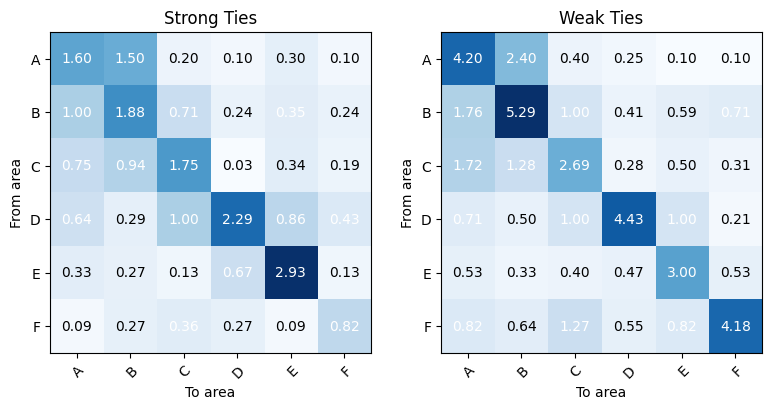

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))


def plot_data(ax, data, title):
    im = ax.imshow(data, cmap='Blues')
    ax.set_title(title)

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(['A', 'B', 'C', 'D', 'E', 'F'])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F'])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text_color = "white" if data[i, j] > np.median(data) else "black"
            ax.text(j, i, f'{data[i, j]:.2f}', ha="center", va="center", color=text_color)
    ax.set_xlabel("To area")
    ax.set_ylabel("From area")


plot_data(ax1, data_strong, "Strong Ties")
plot_data(ax2, data_weak, "Weak Ties")

font = {'family': 'serif', 'weight': 'normal', 'size': 12}
plt.rc('font', **font)
fig.tight_layout()
plt.show()

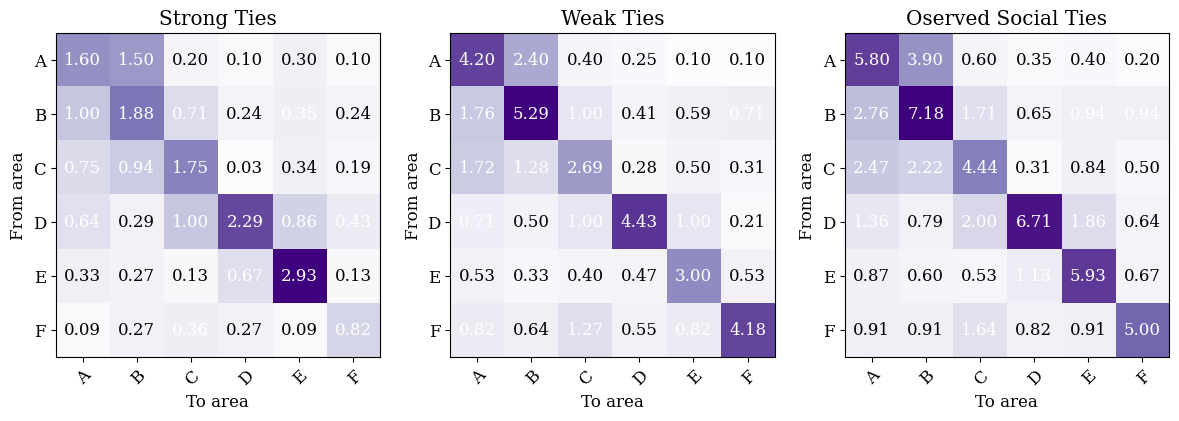

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data_social = data_strong + data_weak

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

def plot_data(ax, data, title):
    im = ax.imshow(data, cmap='Purples')
    ax.set_title(title)
    ax.set_xlabel("To area")
    ax.set_ylabel("From area")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(['A', 'B', 'C', 'D', 'E', 'F'])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F'])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text_color = "white" if data[i, j] > np.median(data) else "black"
            ax.text(j, i, f'{data[i, j]:.2f}', ha="center", va="center", color=text_color)

plot_data(ax1, data_strong, "Strong Ties")
plot_data(ax2, data_weak, "Weak Ties")
plot_data(ax3, data_social, "Oserved Social Ties")


font = {'family': 'serif', 'weight': 'normal', 'size': 11}
plt.rc('font', **font)

fig.tight_layout()
plt.show()
